#Importing Libraries

In [ ]:
#importing liibraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
LE=LabelEncoder()

#Loading File

In [ ]:
dt=pd.read_csv('/content/product_reviews_dataset.csv')

#Data Summary

In [ ]:
dt.head()

,review_text,review_label
0,Good value for money. Highly recommend! Very u...,good
1,Five stars! Very useful and easy to use.,good
2,Very useful and easy to use. Very useful and e...,good
3,Loved it. Very useful and easy to use. Excelle...,good
4,Worst product ever! Very disappointed.,worst


In [ ]:
dt.tail()

,review_text,review_label
995,Amazing quality and value. Amazing quality and...,good
996,Good value for money. Highly recommend! Perfec...,good
997,Good value for money. Very useful and easy to ...,good
998,Low quality material. Had some issues.,bad
999,Loved it. Highly recommend! Highly recommend! ...,good


In [ ]:
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   review_text   1000 non-null   object
 1   review_label  1000 non-null   object
dtypes: object(2)
memory usage: 15.8+ KB


In [ ]:
dt.describe

<bound method NDFrame.describe of                                            review_text review_label
0    Good value for money. Highly recommend! Very u...         good
1             Five stars! Very useful and easy to use.         good
2    Very useful and easy to use. Very useful and e...         good
3    Loved it. Very useful and easy to use. Excelle...         good
4               Worst product ever! Very disappointed.        worst
..                                                 ...          ...
995  Amazing quality and value. Amazing quality and...         good
996  Good value for money. Highly recommend! Perfec...         good
997  Good value for money. Very useful and easy to ...         good
998             Low quality material. Had some issues.          bad
999  Loved it. Highly recommend! Highly recommend! ...         good

[1000 rows x 2 columns]>

In [ ]:
dt.sample()

,review_text,review_label
730,Stopped working after a week. Average experien...,bad


In [ ]:
dt.shape

(1000, 2)

In [ ]:
dt.dtypes

,0
review_text,object
review_label,object


In [ ]:
dt.columns

Index(['review_text', 'review_label'], dtype='object')

In [ ]:
dt.isnull().sum()

,0
review_text,0
review_label,0


In [ ]:
dt.dropna(inplace=True)

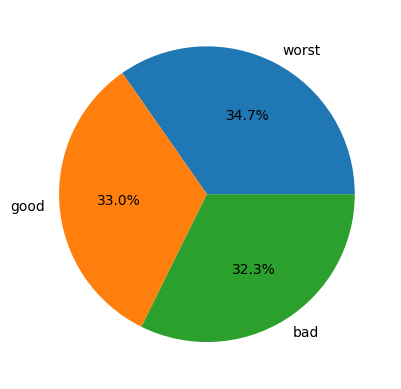

In [ ]:
plt.pie(x = dt['review_label'].value_counts(),
labels = dt['review_label'].value_counts().index, autopct = '%1.1f%%')
plt.show()




In [ ]:
!pip install nltk

In [ ]:
# IMPORT LIB FOR CLEANING TEXT
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize

In [ ]:
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [ ]:
def clean_text(text):
    text = text.lower()
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    tokens = word_tokenize(text)
    stop_words = set(stopwords.words('english'))
    tokens = [token for token in tokens if token not in stop_words]
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(token) for token in tokens]
    cleaned_text = ' '.join(tokens)
    return cleaned_text

In [ ]:
clean_text("i love, to watch. Movies")

'love watch movie'

In [ ]:
x=dt['review_text']

In [ ]:
dt['review_text'].apply(clean_text)

,review_text
0,good value money highly recommend useful easy ...
1,five star useful easy use
2,useful easy use useful easy use highly recommend
3,loved useful easy use excellent product five s...
4,worst product ever disappointed
...,...
995,amazing quality value amazing quality value hi...
996,good value money highly recommend perfect need
997,good value money useful easy use highly recommend
998,low quality material issue


In [ ]:
dt.sample()

,review_text,review_label
643,Average experience. Poor design. Expected bett...,bad


In [ ]:
y=dt['review_label']

In [ ]:
#tfidf
from sklearn.feature_extraction.text import TfidfVectorizer
TFIDF=TfidfVectorizer()

In [ ]:
x=TFIDF.fit_transform(x)

In [ ]:
x=x.toarray()

In [ ]:
from sklearn.naive_bayes import MultinomialNB
MNB=MultinomialNB()

In [ ]:
MNB.fit(x,y)

MultinomialNB()

In [ ]:
MNB.score(x,y)

0.997

In [ ]:
x[0].reshape(1,-1)

array([[0.        , 0.        , 0.23858485, 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.28604455, 0.        , 0.        ,
        0.        , 0.        , 0.2914021 , 0.23371918, 0.28182   ,
        0.        , 0.28348517, 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.21896394,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.28348517, 0.        , 0.        , 0.        , 0.2914021 ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.28604455, 0.        , 0.        , 0.        , 0.28604455,
        0.28604455, 0.        , 0.23515039, 0.21896394, 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ]])

In [ ]:
MNB.predict(x[0].reshape(1,-1))

array(['good'], dtype='<U5')

In [ ]:
MNB.predict(TFIDF.transform(["product is not good"]))

array(['good'], dtype='<U5')